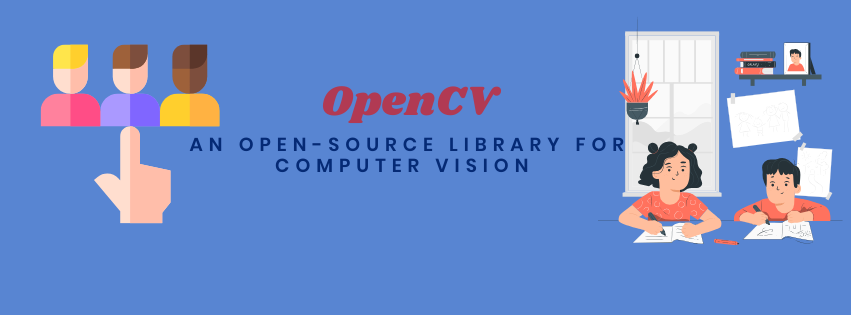

### 🌁 Feature Detection for Image Similarity

* **Definition:** Feature detection in deep learning is the identification of key visual elements in images.
* **Purpose:** It's used to compare and match images based on these elements.
* **Importance:** Enables tasks like image search and retrieval.
* **Advantage:** Provides efficient and accurate image similarity analysis.
* **Example:** Matching images in a content-based image search.

### 🚜 Import Libraries

In [1]:
#OpenCV
import cv2
#regular expression
import re
#mathmetical computation
import numpy as np
#matplotlib for plotting/view image
import matplotlib.pyplot as plt


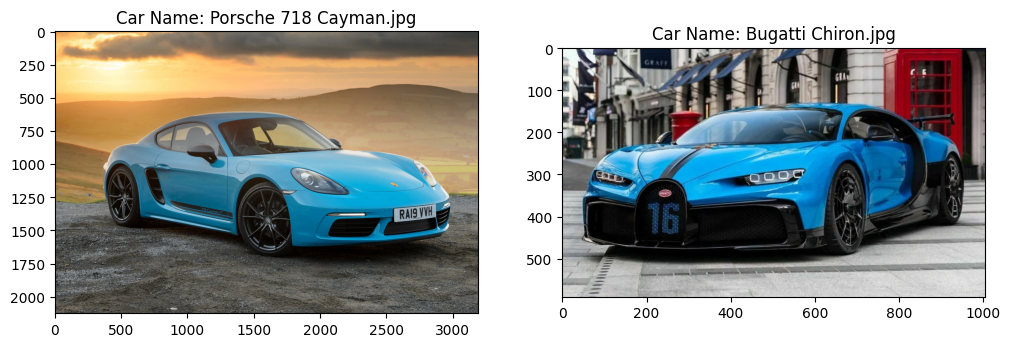

In [10]:
carlist = ['/kaggle/input/cars-similarity/Porsche 718 Cayman.jpg', 
           '/kaggle/input/cars-similarity/Bugatti Chiron.jpg']

# Define a regular expression pattern to extract car names
pattern = r'([^/]+)\.jpg$'

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Loop through the carlist and display the images
for i, car_image_path in enumerate(carlist):
    
    # Extract the car name using regular expression
    car_name = re.search(pattern, car_image_path).group(0)
    
    # Load the image
    image = cv2.imread(car_image_path)
    
    
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image on the corresponding subplot
    axs[i].imshow(image_rgb)
    axs[i].set_title(f'Car Name: {car_name}')

# Show the subplots
plt.show()

In [11]:
car1 = cv2.imread('/kaggle/input/cars-similarity/Porsche 718 Cayman.jpg', cv2.IMREAD_GRAYSCALE)
car2 = cv2.imread('/kaggle/input/cars-similarity/Bugatti Chiron.jpg', cv2.IMREAD_GRAYSCALE)
print(f"shape of car1:{car1.shape}")
print(f"shape of car1:{car2.shape}")

shape of car1:(2126, 3189)
shape of car1:(591, 1004)


* **ORB (Oriented FAST and Rotated BRIEF):** This detector to find keypoints and descriptors for both images. ORB (Oriented FAST and Rotated BRIEF) is a popular feature detection and description algorithm   computer vision which includes image matching and object recognition.
    
    **`--Keypoints:`** Distinct locations/Pixel Co-ordinate
    
    **`--Descriptors:`** Feature representations
 
 **`orb.detectAndCompute:`** Detect and describe keypoints.
 
 **`None:`** process the entire image without any specific region restrictions/**masking**.
 
* **BFMatcher:** The Brute Force Matcher in computer vision is used to compare feature descriptors and **find the best matches** between keypoint features in different images, making it valuable for tasks like image matching, object recognition, and image retrieval.

* **NORM_HAMMING:** is a distance metric used in computer vision for binary feature descriptors. It counts the number of differing bits between two binary strings, where a **lower Hamming distance** indicates **greater similarity** between the descriptors. **Binary feature dissimilarity count.**

* **cv2.drawMatches:** It is an OpenCV function used to draw feature matches between two images.
    
    **`--matches[:50]:`** Top 50 matches.
    
    **`--outImg=None:`** Output image.
    
    **`--flags=2:`** Flags for drawing matches.


 Intial keypoint for car1: < cv2.KeyPoint 0x7f35642b37e0> 
 Intial descriptors for car1: [ 53  29  18  62  83 183  82 226 117  66 232  14 103 250  33 148 248 227
 192 227  47 163  26  63 147 198   0  10 123 119 106 158]

 Intial keypoint for car2: < cv2.KeyPoint 0x7f35642b3540> 
 Intial descriptors for car2: [  9 160 159 115 177 172  96  23 254 155  99  16 158 147  72  58 129  54
 104  24  51 220 155  66 205 191  86  64 200  64 203 160]

 Intial Matching:< cv2.DMatch 0x7f35642cf050>

 Intial Matching After Sorting:< cv2.DMatch 0x7f3560854af0>


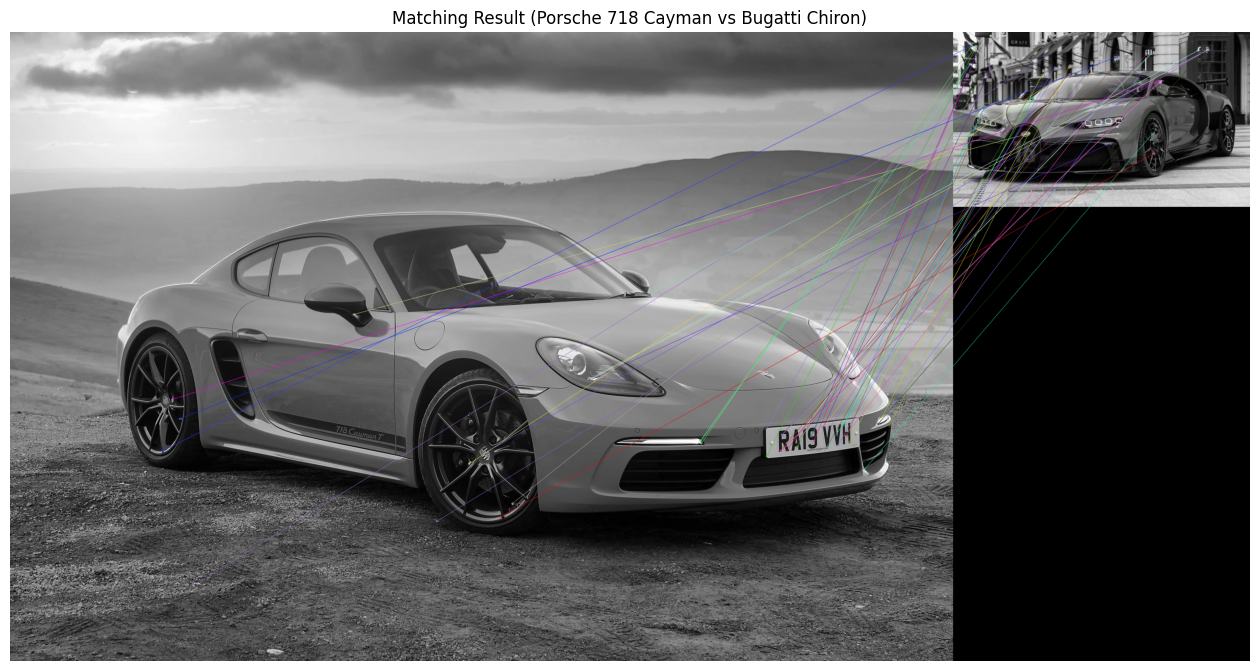

In [12]:

#initialize ORB Detector
orb = cv2.ORB_create()
# Find keypoints and descriptors
keypoints_car1, descriptors_car1 = orb.detectAndCompute(car1, None)
keypoints_car2, descriptors_car2 = orb.detectAndCompute(car2, None)
print(f"\n Intial keypoint for car1: {keypoints_car1[0]} \n Intial descriptors for car1: {descriptors_car1[0]}")
print(f"\n Intial keypoint for car2: {keypoints_car2[0]} \n Intial descriptors for car2: {descriptors_car2[0]}")

# Create BFMatcher (Brute Force Matcher) with HAMMING distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Return list of Match descriptors
matches = bf.match(descriptors_car1, descriptors_car2)
print(f"\n Intial Matching:{matches[0]}")

# Sort matches by distance(the smallest distance (most similar) to the largest distance (less similar))
matches = sorted(matches, key=lambda x: x.distance)
print(f"\n Intial Matching After Sorting:{matches[0]}")


# Create a result image that shows the matches upto 50 best matches
result_image = cv2.drawMatches(car1, keypoints_car1, car2, 
                               keypoints_car2, matches[:50], outImg=None, flags=2)

# Add a title to the image
title = "Matching Result (Porsche 718 Cayman vs Bugatti Chiron)"
plt.figure(figsize=(16, 20))
plt.imshow(result_image)
plt.title(title)
plt.axis('off')

# Display the result
plt.show()

In [13]:
plt.savefig("/kaggle/working/car-similarity.jpg")

<Figure size 640x480 with 0 Axes>

### 🐰 Similarity Score

In [14]:
# Calculate the number of good matches (you can adjust the threshold as needed)
threshold = 50
length_of_match = len(matches)
good_matches = [match for match in matches if match.distance < threshold]  # Adjust the threshold as needed
similarity_score = (len(good_matches) / length_of_match) * 100
print(f"length of matches: {len(matches)}")
print(f"length of good matches: {len(good_matches)}")
print(f"similarity_score: {similarity_score}")

length of matches: 131
length of good matches: 6
similarity_score: 4.580152671755725


### 🐰 Count of Matches of Distance Within Thershold

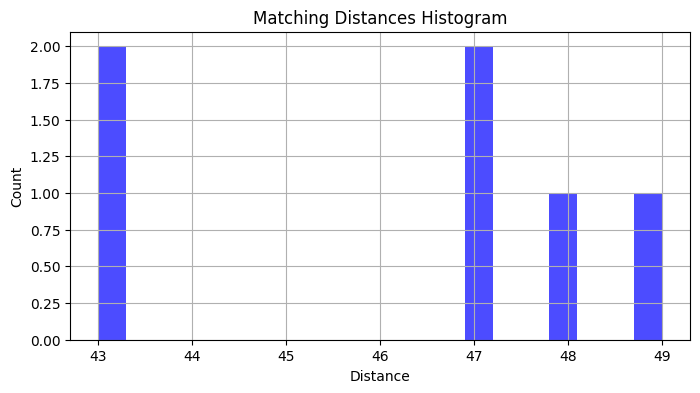

In [15]:
# Create a histogram of matching distances
distances = [match.distance for match in matches if match.distance < 50]

plt.figure(figsize=(8, 4))
plt.hist(distances, bins=20, color='blue', alpha=0.7)
plt.xlabel('Distance')
plt.ylabel('Count')
plt.title('Matching Distances Histogram')
plt.grid(True)
plt.show()

📌 **note:** The histogram visualizes the distribution of matching distances, showing how many keypoints have distances less than the specified threshold (50 in this case), providing insight into the quality of feature matches.

### 🐼 Image Segmentation

This code performs image segmentation using the Watershed algorithm. It starts by preprocessing the image with thresholding  to identify objects of interest and morphological operations to distinguish foreground **(refers to the objects or regions of interest in an image)** and background. Morphological operations remove noise, and the distance transform highlights the likely foreground.The algorithm then generates markers to identify regions of interest and dilates them to control the marker width. The Watershed algorithm then separates and labels regions in the image, marking boundaries in red, making it a useful technique for segmenting objects in complex images.

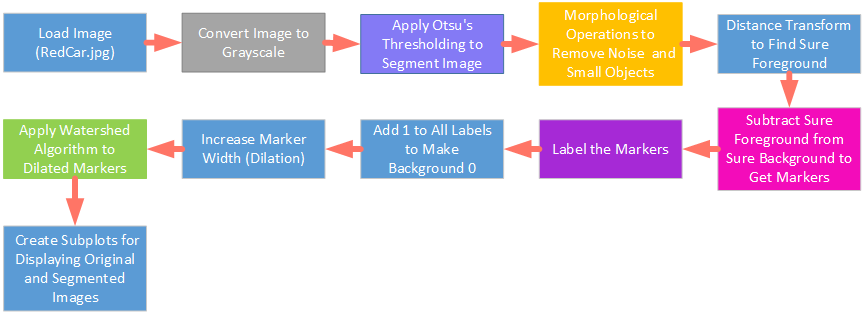

### 📺 Image Segmentation Code Explanation 

**Otsu's thresholding** is a technique used in image processing to automatically determine the optimal threshold value to separate an image into two classes: foreground and background. 

**`cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU):`**  
 **--`gray:`** image type.
    
 **--` 0:`** Minimum Pixel value.
     
 **--`255:`** Maximum Pixel value.
 
 **--`cv2.THRESH_BINARY:`** converts the input image into a binary image. Metrics of Binary coversion of image pixel. It will be 0 for **Less than Threshold**It will be 255 for **Greater than Threshold**
 
 **--`cv2.THRESH_OTSU:`** indicates that Otsu's thresholding should be applied to automatically determine the optimal threshold value based on the image's histogram.

**`kernel = np.ones((3, 3), np.uint8):`** Locally transforms pixel values.

 **--`np.ones(3,3):`** This type of kernel is suitable for operations like dilation(expands) and Erosion(Shrinks). We can use larger kernels like 5x5 or 7x7. Kernel is used for Filtering, Convolution, Morphological Operations, Feature Extraction, Segmentation, Pattern Recognition. 

 **--`np.uint8:`** 8bits unsigned integer;  2^8 = 256

**`cv2.morphologyEx:`** to perform morphological opening on a binary thresholded image.

   **--`thresh:`** This is the input binary image.
   
   **--`cv2.MORPH_OPEN:`** Morphological opening is a combination of two basic operations: **erosion followed by dilation**.
   
   **-- `kernel:`** determines the size and shape of the neighborhood around each pixel during the opening.
   
   **-- `iterations=3:`** number of times the morphological operation is applied.

**For Background:`sure_bg = cv2.dilate(opening, kernel, iterations=5):`**  to perform dilation on the result of a previous morphological operation. 
   
   **-- `opening:`** previous opening for morphological operation 
   
   **-- `kernel:`** determines the size and shape of the neighborhood around each pixel during the opening.
   
   **-- `iterations=5:`** number of times the morphological operation is applied for dilation(expands)

**`cv2.distanceTransform:`** computes the distance transformation

   **-- `opening:`** previous opening for morphological operation. 
   
   **-- `cv2.DIST_L2:`** Euclidean distance metric.
   
   **-- ` 5:`** Pixel size in the distance map, influencing the scale of distances in the result.

**For: foreground `_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0):`**
   
   **-- `cv2.threshold:`** To process thresholding images
   
   **-- `dist_transform:`** call dist_transform 
   
   **-- `0.7 * dist_transform.max():`**  maximum pixel value, this expression multiplies it by 0.7 (which is equivalent to 70%). The purpose of multiplying by 0.7 is to set the threshold level at 70% of the maximum pixel value.
   
   **-- `255:`** maximum pixel value
   
   **-- `0:`** minimum pixel value
   
**`unknown = cv2.subtract(sure_bg, sure_fg):`** by subtracting the sure foreground (sure_fg) from the sure background (sure_bg)

**`cv2.connectedComponents(sure_fg):`** segmentation  of connected regions or objects or components in a binary image.

**`markers[unknown == 255] = 0:`** assigns label 0 to the "unknown" regions, which helps distinguish objects from background during image segmentation.

**`dilated_markers = cv2.dilate(markers, None, iterations=marker_thickness):`**

   **--`markers:`** connected component labeling in image segmentation.
   
   **--`None:`** it uses a 3x3 square kernel by default.
   
   **--`iterations = 5:`** number of times the morphological operation is applied.
   
**`dilated_markers.astype(np.int32):`**  -1 to indicate boundaries or markers for watershed algorithm. These negative values are easier to work with when using **int32** rather than **uint8**

**watershed:** label regions or objects in an image by adding a layer that represents the boundaries between these regions. 
   
   **-- `cv2.watershed(image, dilated_markers):`** by using this line of code does we provide a additional layer on image for segmentation and marking.

**`image[dilated_markers == -1] = [0, 0, 255]:`**  **`-1`** special marker for segmentation to make boundary where different objects overlap. And **`[0, 0, 255]`** for red color boundary.




value of Threshold: [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255   0]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
Distance Transformation: [[251.09291 250.48982 249.88673 ... 287.      287.      287.     ]
 [250.296   249.69292 249.08983 ... 286.      286.      286.     ]
 [249.4991  248.89601 248.29292 ... 285.      285.      285.     ]
 ...
 [  0.        0.        0.      ...   0.        0.        0.     ]
 [  0.        0.        0.      ...   0.        0.        0.     ]
 [  0.        0.        0.      ...   0.        0.        0.     ]]
Result of Subtraction between background and foreground:
 [[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255   0]
 [  0   0   0 ... 255 255   0]
 [  0   0   0 ... 255 255   0]]


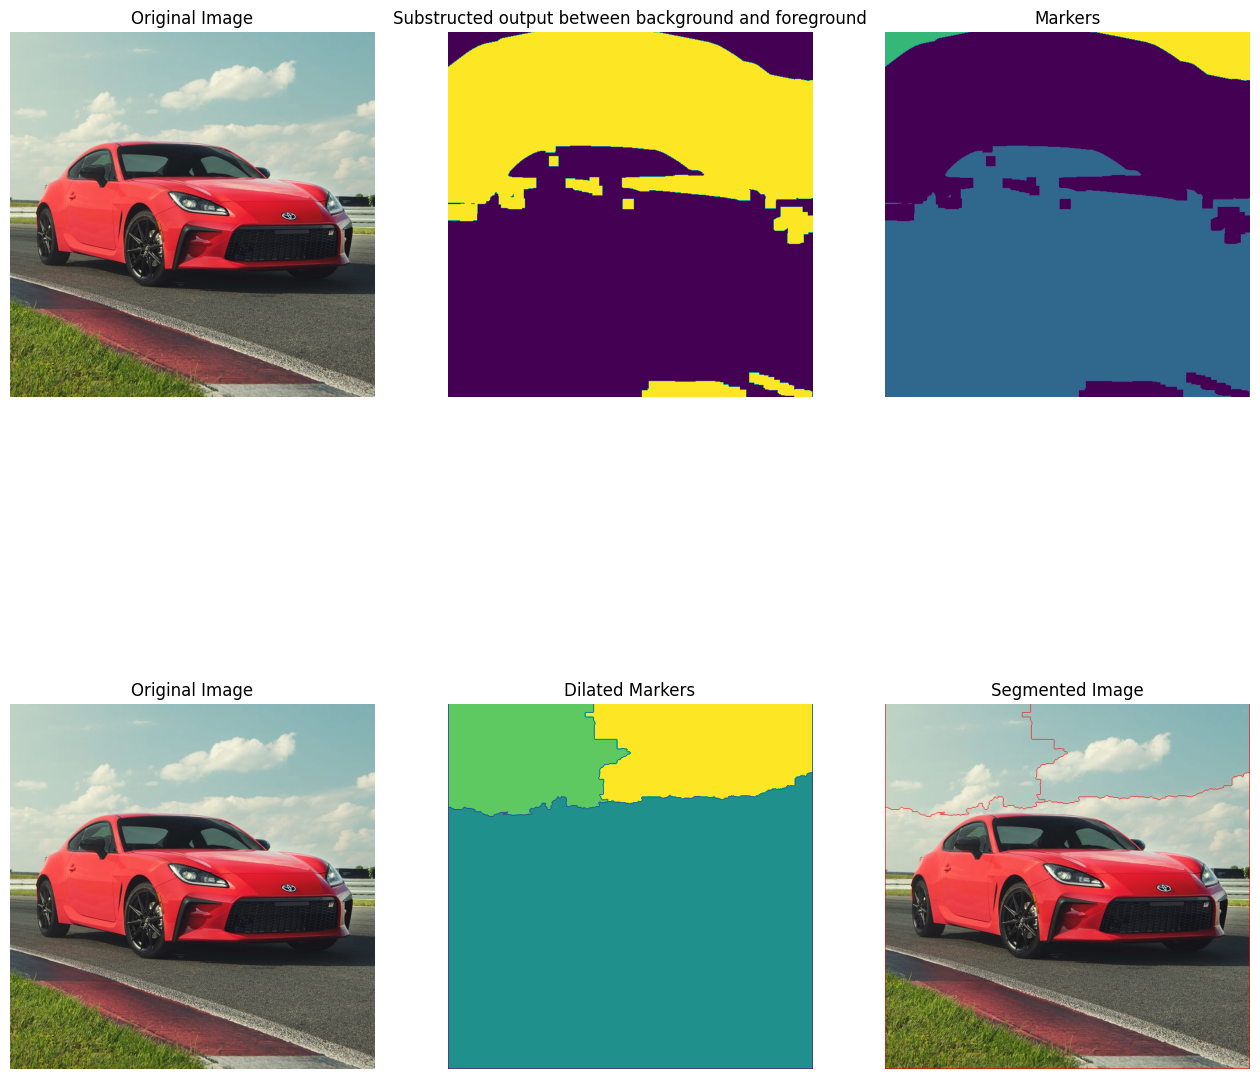

In [9]:
# Convert BGR to RGB
path = '/kaggle/input/object-sample-01/RedCar.jpg'
original_image = cv2.imread(path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
# Load the image
image = cv2.imread(path)



# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to segment the image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(f"value of Threshold: {thresh}")
# Morphological operations to remove noise and small objects
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=3)
sure_bg = cv2.dilate(opening, kernel, iterations=5)

# Distance transform to find the sure foreground
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
print(f"Distance Transformation: {dist_transform}")
_, sure_fg = cv2.threshold(dist_transform, 0.7* dist_transform.max(), 255, 0)

# Subtract sure foreground from sure background to get markers
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
print(f"Result of Subtraction between background and foreground:\n {unknown}")

# Label the markers
_, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all labels to make sure the background is 0
markers = markers + 1
markers[unknown == 255] = 0


## Convert markers to 8-bit unsigned integer
markers = np.uint8(markers)

# Increase marker width (dilation)
marker_iteration =15  
dilated_markers = cv2.dilate(markers, None, iterations=marker_iteration)
# Convert markers to 32-bit signed integer data type
dilated_markers = dilated_markers.astype(np.int32)
# Apply the Watershed algorithm to dilated markers
cv2.watershed(image, dilated_markers)

# Overlay the segmented image on the original image
image[dilated_markers == -1] = [0, 0, 255]  # Boundary marks in Red

# Convert BGR image to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(16,16))

# Original image subplot
axs[0][0].imshow(original_image)
axs[0][0].set_title("Original Image")
axs[0][0].axis('off')

# Substructed output between background and foreground subplot
axs[0][1].imshow(unknown)
axs[0][1].set_title("Substructed output between background and foreground")
axs[0][1].axis('off')

# Markers subplot
axs[0][2].imshow(markers)
axs[0][2].set_title("Markers")
axs[0][2].axis('off')

# Segmented image subplot
axs[1][0].imshow(original_image)
axs[1][0].set_title("Original Image")
axs[1][0].axis('off')

# Dilated(Expand) Markers subplot
axs[1][1].imshow(dilated_markers)
axs[1][1].set_title("Dilated Markers")
axs[1][1].axis('off')


# Segmented image subplot
axs[1][2].imshow(image_rgb)
axs[1][2].set_title("Segmented Image")
axs[1][2].axis('off')
plt.show()
